# Business Statistics: E-news Express

## Define Problem Statement and Objectives

#### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

#### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. The objective is to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?

#### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Read in data
df = pd.read_csv('abtest.csv')

# Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

In [3]:
# Print the data head
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

* There are 6 columns of data



In [44]:
# Print out data tail
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations
* There are 100 rows of data

In [5]:
# Print the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations
*  The average time spent on the webpage is ~5.4 minutes with standard deviation of ~2.4 minutes.  
*  The minimum time spend on the webpage was ~0.2 minutes and maximum time was ~10.7 minutes. 
*  The mean and median times are similar indicating that the data are likely normally distributed.

In [47]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations
* There is one column of integer values, one column of float values, and the rest are object.

In [48]:
# Check for missing values in the data
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations

*  There are no missing values in the data.


In [49]:
# Check for duplicates 
df.duplicated().sum()

0

#### Observations
* There are no duplicates in the data.

### Univariate Analysis


#### Observations on user id

In [7]:
#  Determine the uniqueness of user id's
unique_id = df['user_id'].nunique()
print('There are '+str(unique_id)+' unique user_ids.')

There are 100 unique user_ids.


#### Observations
* There are 100 unique user_id's

#### Observations on group



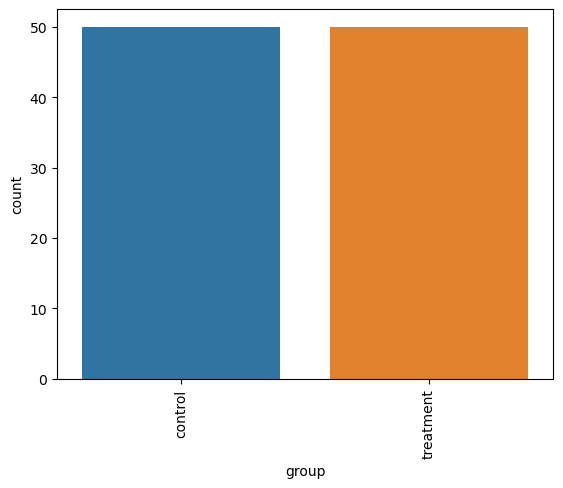

There are 50 customers in the control group and 50 customers in the treatment group.


In [51]:
# Plot the group variable
sns.countplot(data=df,x='group')
plt.xticks(rotation=90)
plt.show()

# Print the number of control versus treatment
num_control = len(df[df['group'] == 'control'])
num_treat   = len(df[df['group'] == 'treatment'])
print('There are ' + str(num_control) + ' customers in the control group and ' + str(num_treat) + ' customers in the treatment group.')

#### Observations
* There are an equal number (50) of customers in the control group and the treatment group.

#### Observations on Landing Page



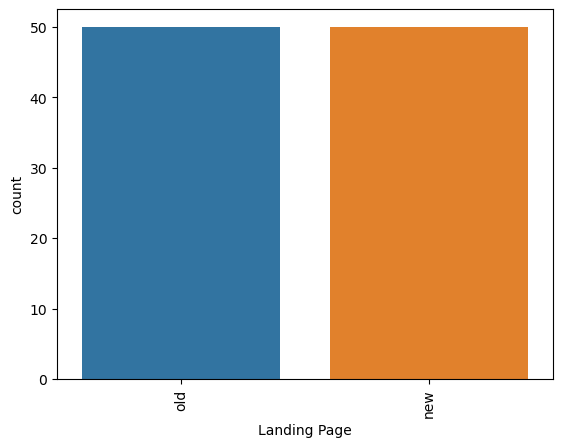

There are 50 customers on the old landing page and 50 on the new.


In [52]:
#  Plot the landing_page variable
sns.countplot(data=df,x='landing_page')
plt.xticks(rotation=90)
plt.xlabel('Landing Page')
plt.show()

# Print the number of old versus new landing_page
num_old = len(df[df['landing_page']== 'old'])
num_new = len(df[df['landing_page']== 'new'])
print('There are ' + str(num_old) + ' customers on the old landing page and ' + str(num_new) + ' on the new.')

#### Observations

- There are an equal number \(50\) of customers on the old landing page compared to the new.

#### Observations on Time Spent on the Page



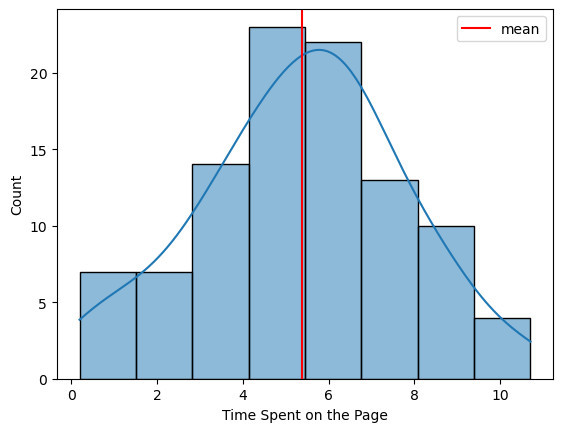

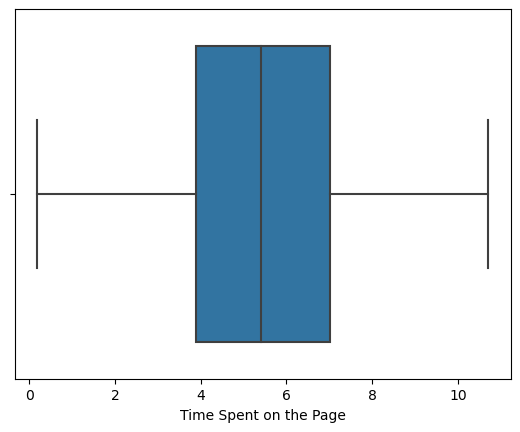

The min, max, and median are 0.19, 10.71, and 5.415 minutes.


In [53]:
# Plot a histogram of the time_spent_on_the_page and represent the mean with vertical line
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
mu = df['time_spent_on_the_page'].mean()
plt.axvline(x=mu, c='r', label='mean') #plots vertical line at mean
plt.xlabel('Time Spent on the Page')
plt.legend()
plt.show()

# Plot a boxplot of the time_spent_on_the_page
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.xlabel('Time Spent on the Page')
plt.show()

# Print the min, max, and median
min_t = df['time_spent_on_the_page'].min()
max_t = df['time_spent_on_the_page'].max()
med_t = df['time_spent_on_the_page'].median()
print('The min, max, and median are ' + str(min_t) + ', ' + str(max_t) + ', and ' + str(med_t) + ' minutes.')

#### Observations
* The distribution of the time spent on the page is normally distributed.  
* The maximum time spent on the page was ~0.2 minutes and the maximum was ~10.7 minutes.  The median time spent on the page was ~5.4 minutes.
* There are no outliers.

#### Observations on Converted

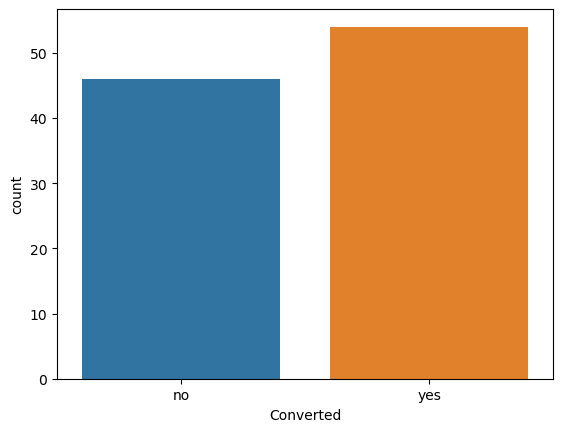

The number of converted customers is 54 and the number of not converted is 46.


In [54]:
# Plot of converted variable
sns.countplot(data=df,x='converted')
plt.xlabel('Converted')
plt.show()

# Print out number of converted and not converted
converted     = len(df[df['converted'] == 'yes'])
not_converted = len(df[df['converted'] == 'no'])
print('The number of converted customers is ' + str(converted) + ' and the number of not converted is ' + str(not_converted) +'.')

#### Observations
* 54% customers were converted and 46% were not converted.

#### Observations on Language Preferred

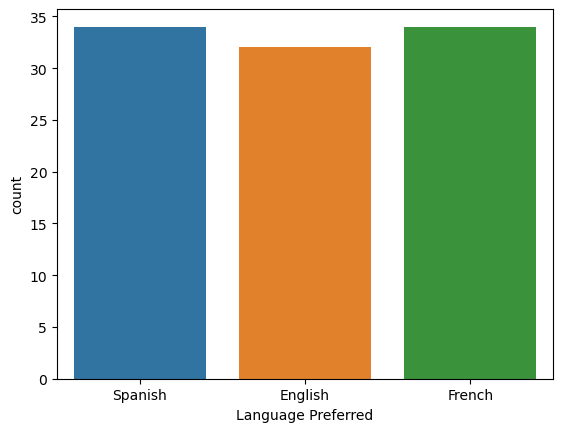

The language preferences are 34 prefer Spanish, 32 prefer English, and 34 prefer French.


In [55]:
# Plot of language preferred variable
sns.countplot(data=df,x='language_preferred')
plt.xlabel('Language Preferred')
plt.show()

# Print out number of language preferences
spanish = len(df[df['language_preferred'] == 'Spanish'])
english = len(df[df['language_preferred'] == 'English'])
french  = len(df[df['language_preferred'] == 'French'])
print( 'The language preferences are ' + str(spanish) + ' prefer Spanish, ' + str(english) +' prefer English, and ' + str(french) + ' prefer French.')

#### Observations
*  34 customers prefer Spanish, 32 prefer English, and 34 prefer French.
*  Spanish and French are the most preferred languages, and English is the least preferred by customers.

### Bivariate Analysis

#### Relationship between landing page and time spent on the page

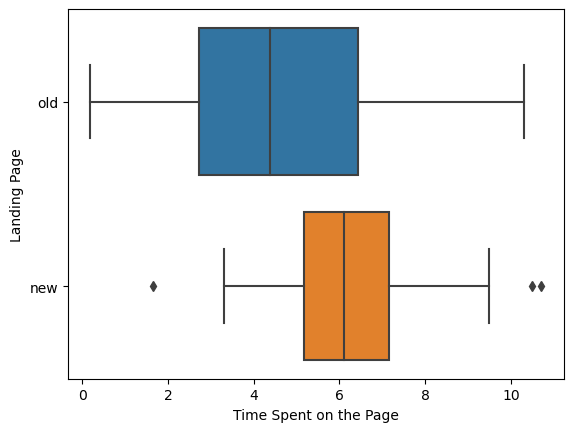

In [70]:
# Plot to compare landing page to time spent on page
sns.boxplot(data=df, x="time_spent_on_the_page", y="landing_page")
plt.xlabel('Time Spent on the Page')
plt.ylabel('Landing Page')
plt.show()

#### Observations
* There are a wider range of times spent on the old landing page compared to the new. 
* The median time spent on the page is higher for the new landing page compared to the old.
* More than 75% of the new landing page data is above the median for the old landing page.
* The data are slightly right skewed for both landing pages.
* There are some outliers present in the new landing page data.

#### Relationship between conversion and time spent on the page

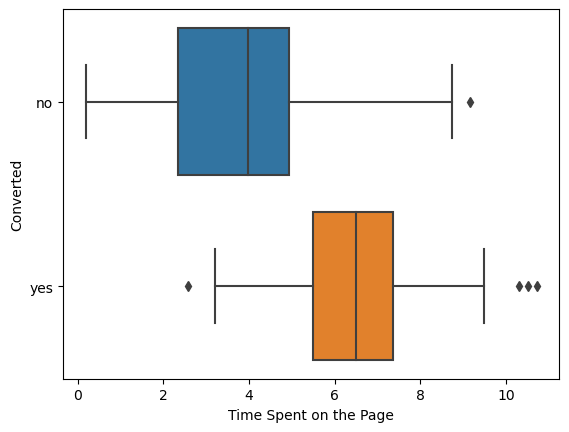

In [71]:
# Plot to compare if customers were converted to time spent on page
sns.boxplot(data=df, x="time_spent_on_the_page", y="converted")
plt.xlabel('Time Spent on the Page')
plt.ylabel('Converted')
plt.show()

#### Observations
* Customers not converted are associated with less time spent on the page.
* More than 75% of the data for not converted is greater than 50% of the data for not converted.
* The data for not converted may be slightly right skewed.
* The data for converted customers appears approximately normally distributed.
* Both sets of data contain at least one outlier or more.

#### Relationship between preferred language and time spent on the page

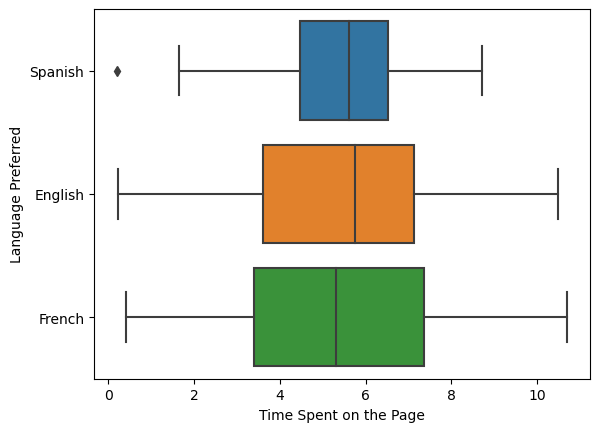

In [73]:
# Plot to compare preferred language with time spent on the page
sns.boxplot(data=df, x="time_spent_on_the_page", y="language_preferred")
plt.xlabel('Time Spent on the Page')
plt.ylabel('Language Preferred')
plt.show()

#### Observations
* Spanish customers had the smallest range of times spent on the page compared to English and French.
* English and French have similar distributions with English having a slighlty higher median time.
* The data for French customers appears to be normally distributed wheareas English and Spanish have a slight left skew.
* The Spanish data have an outlier present.

## Do the users spend more time on the new landing page than the existing landing page?

### Step 0: Perform Visual Analysis

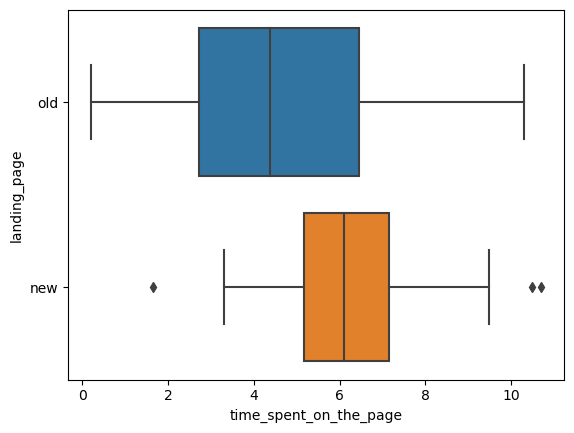

Customers spent a total of 226.62 minutes on the old page and 311.16 minutes on the new page.


In [10]:
# Plot of landing page versus time spent on the page
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page')
plt.show()

# Print out total time spent on the old and new page
old_time = df[df['landing_page'] == 'old']
new_time = df[df['landing_page'] == 'new']
sum_old_time = old_time['time_spent_on_the_page'].sum()
sum_new_time = new_time['time_spent_on_the_page'].sum()
print('Customers spent a total of ' + str(np.round(sum_old_time, decimals=2)) + ' minutes on the old page and '+ str(sum_new_time) +' minutes on the new page.')

In [11]:
# Print descriptive statistics of the old landing page
old_time.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546566.5000,17.677670,546493.00,546555.25,546567.50,546579.7500,546592.0
time_spent_on_the_page,50.0,4.5324,2.581975,0.19,2.72,4.38,6.4425,10.3


In [12]:
# Print descriptive statistics of the new landing page
new_time.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.0,546467.5000,14.577380,546443.00,546455.250,546467.500,546479.75,546492.00
time_spent_on_the_page,50.0,6.2232,1.817031,1.65,5.175,6.105,7.16,10.71


#### Observations

- Customers spent a total of 226 minutes on the old page versus 311 minutes on the new page
- On the old landing page times range from ~0.2 minutes to 10.3 minutes with an average of 4.5 minutes and median of 4.38 minutes.
- The times range from ~1.7 minutes to ~10.7 minutes on the new landing page with an average of 6.2 minutes and median of ~6.1 minutes.
- There are some outliers present in the new landing page data.
- In general, the new landing page is associated with longer times spent on the page with a higher average and median time compared to the old landing page.

### Step 1: Define the null and alternate hypotheses

Let $\mu_{new}$ and $\mu_{old}$ be the average time spent by customers on the new landing page and old landing page, respectively.

The null hypothesis is defined as the average time spent by customers on the new landing page is equal to the average time spent by customers on the old landing page, or

>$H_o: \mu_{new} = \mu_{old}$.

The alternative hypothesis is that customers spend more time on average viewing the new landing page as opposed to the old landing page, or

>$H_a: \mu_{new} > \mu_{old}$.

### Step 2: Select Appropriate test

In [60]:
# Show that the standard deviations are unqeual
old_time_std = old_time['time_spent_on_the_page'].std()
new_time_std = new_time['time_spent_on_the_page'].std()

# Print the standard deviations
print('The standard deviation of the time spent by customers on the old landing page was ' + str(np.round(old_time_std, decimals=2)) +' and the standard deviation of the time spent by customers on the new landing page was ' + str(np.round(new_time_std, decimals=2)) + '.  So the standard deviations of the samples are not equal.')

The standard deviation of the time spent by customers on the old landing page was 2.58 and the standard deviation of the time spent by customers on the new landing page was 1.82.  So the standard deviations of the samples are not equal.


#### Assumptions of Two Independent Sample T-test for Equality of Means with Unequal Standard Deviations
* Continuous data - Yes, the time spent on the page is a continuous variable.
* Normally distributed populations - Yes, it is normally distributed.  See univariate analysis.
* Independent populations - Yes, they are random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - Yes, since the sample standard deviations are different, the population standard deviations may be assumed to be different.  See above code.
* Random sampling from the population - Yes, the collected sample is stated as a simple random sample.

### Step 3: Decide the significance level

It states in the problem that the significance level is $\alpha = 0.05$

### Step 4: Collect and prepare data

In [61]:
# Seperate time spent on the page wrt the old from the new landing page 
old_time = df[df['landing_page'] == 'old']
new_time = df[df['landing_page'] == 'new']

# Confirm separation of data: old from new
old_time.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [62]:
# Confirm separation of data: old from new
new_time.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


### Step 5: Calculate the p-value

In [63]:
# Import the necessary scipy module
from scipy.stats import ttest_ind

# Determine the p-value
test_statistic, p_value = ttest_ind(new_time['time_spent_on_the_page'], old_time['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

* The p-value is ~0.000139 and the level of significance $\alpha$ is 0.05.  
* Since 0.000139 < 0.05 th p-value is smaller than the level of significance.

### Step 7:  Draw inference

* Since the p-value (0.000139) < $\alpha$ (0.05) then the null hypothesis is rejected.  
* Hence, we have enough statistical evidence to support the claim that customers spend more time on average viewing the new landing page as opposed to viewing the old landing page.

## Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Step 0: Perform Visual Analysis

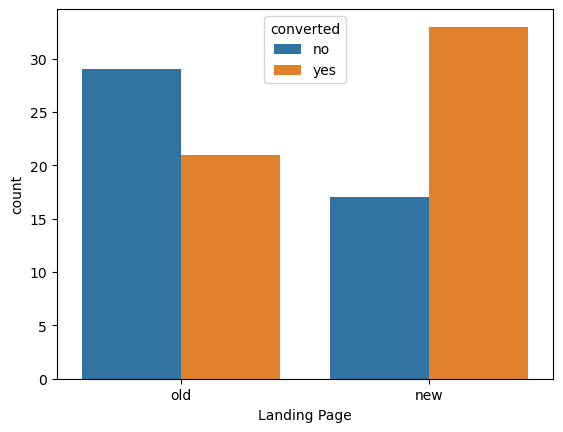

Approximately 42.0% were converted on the old landing page versus 66.0% were converted on the new landing page.


In [104]:
# Plot of count comparing old and new landing page and how many converted
sns.countplot(data=df, x='landing_page', hue='converted')
plt.xlabel('Landing Page')
plt.show()

# Percentage of those converted on the new page versus old
old = df[df['landing_page'] == 'old']
new = df[df['landing_page'] == 'new']

# Obtain the total number of converted on the old landing page versus the new landing page
num_convert_old = len(old[old['converted'] == 'yes']) 
num_convert_new = len(new[new['converted'] == 'yes']) 

# Convert to percentages
perc_convert_old = ((num_convert_old)/50)*100
perc_convert_new = ((num_convert_new)/50)*100

# Print out the percentages
print('Approximately ' + str(perc_convert_old) + '% were converted on the old landing page versus ' + str(perc_convert_new) + '% were converted on the new landing page.')

#### Observations
* More customers were converted on the new landing page than on the old.
* On the other hand, more customers were not converted on the old page versus the new.
* However, there were a higher number of those converted on the old page than those not converted on the new page.

### Step 1: Define the null and alternate hypotheses

Let $p_{new}$ and $p_{old}$ be the proportion of users who visit the landing page and get converted on the new page and old page, respectively.

The null hypothesis is that the conversion rate is the same for the new page and the old page, or
>$H_0: p_{new} = p_{old}$.
    
The alternative hypothesis is that the conversion rate is greater for the new page versus the old page, or
>$H_a: p_{new} > p_{old}$.

### Step 2: Select Appropriate test

#### Determine $n$ and $p$ (sample size and sample proportions) for Two Proportion Z-test

In [64]:
# Seperate data into new and old landing page
new_page = df[df['landing_page']== 'new']
old_page = df[df['landing_page']== 'old']

# Determine the sample sizes from the new and old landing page
new_n_users = len(new_page)
old_n_users = len(old_page)
print('The number of total users on the new landing page was ' + str(new_n_users) + ' and the number of users on the old landing page was ' + str(old_n_users) + '.')

# Find the number converted on the new and old landing page
new_converted = new_page[new_page['converted'] == 'yes']
old_converted = old_page[old_page['converted'] == 'yes']
p_new = len(new_converted)/new_n_users
p_old = len(old_converted)/old_n_users

print('The proportion of users converted on the new landing page was ' + str(p_new) + ' and on the old landing page ' + str(p_old) + '.')

The number of total users on the new landing page was 50 and the number of users on the old landing page was 50.
The proportion of users converted on the new landing page was 0.66 and on the old landing page 0.42.


### Two Proportion Z-test

#### Z-test assumptions 

*   Binomally distributed population - Yes, users are either converted or not converted.
*   Random sampling from the population - Yes, it is stated in the problem that it is a simple random sample.  
*   The binomial distribution can be approximated to a normal distribution by CLT. 
*   $n$ and $p$ refer to the sample size and sample proportion, respectively:
>$\begin{align} np_{new}   & = 50 \cdot 0.66     & = 33  \geq 10 \\
n(1-p_{new})               & = 50 \cdot (1-0.66) & = 17  \geq 10 \\
np_{old}                   & = 50 \cdot 0.42     & = 21  \geq 10 \\
n(1-p_{old})               & = 50 \cdot (1-0.42) & = 29  \geq 10 \end{align}$

### Step 3: Decide the significance level

* It states in the problem that the significance level is $\alpha = 0.05$.

### Step 4: Collect and prepare data
* See Step 2 where I have already separated the data.

### Step 5: Calculate the p-value

In [65]:
# Import the necessary python module
from statsmodels.stats.proportion import proportions_ztest

# Set the number of converted users for old and new landing page (refer to Step 2 for variables)
converted_users = np.array([len(new_converted), len(old_converted)])

# Array of sample sizes for old and new landing page
n_obs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_users, n_obs)
print('The p-value is ' + str(p_value) + '.')

The p-value is 0.016052616408112556.


### Step 6: Compare the p-value with $\alpha$

* The p-value is 0.01605216408112556 and the level of significance $\alpha$ is 0.05. 
* p-value (~0.0161) < $\alpha$ (0.05)

### Step 7:  Draw inference

* Since the p-value is smaller than the level of significance the null hypothesis is rejected and we have enough statistical evidence to claim that the user conversion rate is higher on the new landing page than on the old landing page.

## Is the conversion and preferred language are independent or related?

### Step 0: Perform Visual Analysis

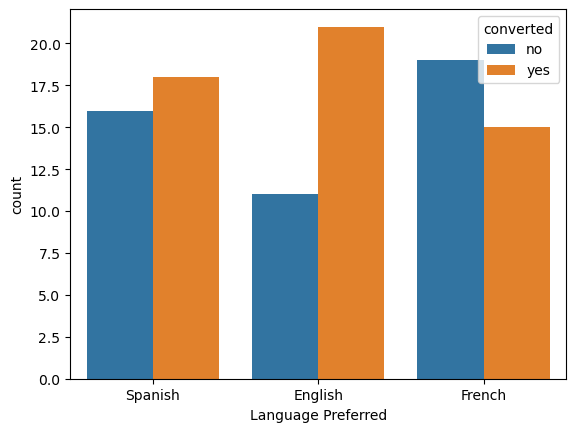

In [83]:
# Plot of count comparing conversion with preferred language
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.xlabel('Language Preferred')
plt.show()

#### Observations
* English had the highest number of customers converted and the lowest number of customers not converted. 
* French had more not converted than converted.
* Spanish had slightly more converted than not converted.

### Step 1: Define the null and alternate hypotheses

Let the null hypothesis be
>$H_0$: the conversion and preferred language are independent of each other.

Furthermore, let the alternative hypothesis be
>$H_a$: the conversion and preferred language are dependent on each other.

### Step 2: Select Appropriate test

### Chi Square Test of Independence assumptions

* Categorical variables - Yes, language preferred is English, Spanish, or French.  Conversion is only yes or no.
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes.
* Random sampling from the population - Yes, the problem states it is a simple random sample.


### Step 3: Decide the significance level
* The problem states a level of significance of $\alpha$ = 0.05. 

### Step 4 and 5:  Collect Data and Compute the p-value

In [66]:
# Import the necessary scipy module
from scipy.stats import chi2_contingency

# Create a contingency table of the data
df_crosstab = pd.crosstab(df['converted'], df['language_preferred'], margins = False) 

# Determine the p-value using the chi square function
chi, p_value, dof, expected = chi2_contingency(df_crosstab)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare p-value with $\alpha$

* The p-value is greater than the level of signifance.

### Step 7: Draw Inference

* Since the p-value is ~0.213 and the level of significance is 0.05 the null hypothesis can not be rejected. Therefore, there is no statistical evidence to support the claim that conversion depends on language preferred.

## Is the time spent on the new page same for the different language users?

### Step 0: Perform Visual Analysis

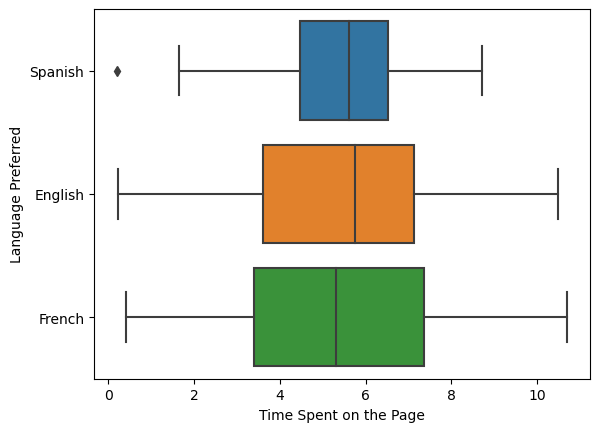

In [85]:
# Plot to compare language with time spent on the page
sns.boxplot(data=df, x="time_spent_on_the_page", y="language_preferred")
plt.xlabel('Time Spent on the Page')
plt.ylabel('Language Preferred')
plt.show()

#### Observations
* Spanish customers had the smallest range of times spent on the page compared to English and French.
* English and French have similar distributions with English having a slighlty higher median time.
* The data for French customers appears to be normally distributed wheareas English and Spanish have a slight left skew.
* The Spanish data have an outlier present.

### Step 1: Define the null and alternate hypotheses

Let $\mu_E, \mu_S, \mu_F$ be the means of time spent on the new page for English, Spanish, and French, respectively.

Then we define the null hypothesis to be

>$H_0: \mu_E = \mu_S = \mu_F$

and the alternative hypothesis

>$H_a: $ At least one time spent on the page is different between the different language users.


### Step 2: Select Appropriate test

#### One-way ANOVA test
* Time spent on the page is the response variable and preferred language is the factor.

In [86]:
# Obtain the levels of the factor preferred language
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [88]:
# Average time spent on the page at different levels of the preferred language factor
print(df.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


### Ancillary Tests to the One-way ANOVA Test

#### Shapiro-Wilks Test: Testing the response variable for normality

For this test the null hypothesis is

>$H_0:$ Time spent on the page follows a normal distribution 

whereas, the alternative hypothesis is

>$H_a:$ Time spent on the page does not follow a normal distribution

In [ ]:
# Import necessary python module
from scipy import stats

# Determine the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

#### Shapiro-Wilk's Test Conclusion
*  The p-value (~0.564) is greater than the level of significance ($\alpha = 0.05$) so the null hypothesis can not be rejected.  So we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s Test: homogeneity of variances

Let the null hypothesis be

>$H_0$: All population variances are equal

and let the alternative hypothesis be

>$H_a$: At least one variance is different

In [ ]:
# Import the necessary python module
from scipy.stats import levene

# Run the Levenes Test
statistic, p_value = levene(df['time_spent_on_the_page'][df['language_preferred']=='English'], 
                            df['time_spent_on_the_page'][df['language_preferred']=='Spanish'], 
                            df['time_spent_on_the_page'][df['language_preferred']=='French'])
# Print the p-value
print('The p-value is', p_value)

#### Levene's Test Conclusion
*  The p-value (~0.065) is greater than the level of significance ($\alpha = 0.05$) so we fail to reject the null hypothesis of homogeneity of variances.

### One-way ANOVA Test Assumptions Verification

* The populations are normally distributed was verified by the Shapiro-Wilk’s test.
* The problem states that the collected sample is a simple random sample.
* The homogeneity of variance assumption was verified using the Levene's test.

### Step 3: Select level of Significance
*  The problem states to use a level of significance of $\alpha=0.05$.

### Steps 4 and 5:  Collect Data and Implement Test

In [106]:
# Import the necessary python module
from scipy.stats import f_oneway

# Determine the p-value using a one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French',  'time_spent_on_the_page'])
# Print out the p-value
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Steps 6: Compare p-value with Level of Significance 

* The p-value is greater than the level of significance. 

### Step 7: Draw Inference

#### One-way ANOVA test conclusions
*  The p-value (~0.867) is greater than the level of significance $\alpha = 0.05$ therefore the null hypothesis can not be rejected.  Thus, there is not enough statistical evidence to conclude that the average time spent on the page is different for the different preferred languages of English, Spanish, and French among users.

## Conclusions and Business Recommendations

* Out of 100 customers, half were in the control group or viewed the old landing page and the other half were in the treatment group or viewed the new landing page.
* Customer times spent on either page ranged from 0.2-10.7 minutes with an average of 5.4 minutes and standard deviation of 2.4 minutes.  
* The new landing page was associated with longer times spent on the page and a higher average and median time compared to the old landing page; customers spent 85 more minutes total on the new landing page.
* More customers converted on the new landing page than the old; approximately, 42.0% were converted on the old landing page versus 66.0% on the new landing page.
* English had the highest number of customers converted and the lowest number of customers not converted compared to French and Spanish.
* There is statistical evidence to support the claims that – 
    * customers spend more time on average on the new landing page as opposed to the old landing page.
    * customer conversion rate is higher on the new landing page than on the old landing page.
* There is no statistical evidence to support the claim that conversion depends on language preferred or that the average time spent on the page is different for the different preferred languages of English, Spanish, and French among users.
* ENews should focus on continuing to improve on the new landing page since customers spent more time and more conversions were seen on the new page.
* Since the new landing page showed a higher converstion rate and it was associated with longer times spent on the page the ENews development team should consider additional ways to keep customers engaged on the page.